In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster
import pandas as pd
import os

In [6]:
files=glob.glob("./Stocks/*.txt")
print(np.shape(files))
print(files[:20])

(7194,)
['./Stocks/ardc.us.txt', './Stocks/epix.us.txt', './Stocks/eab.us.txt', './Stocks/batra.us.txt', './Stocks/inbk.us.txt', './Stocks/bgx.us.txt', './Stocks/strt.us.txt', './Stocks/manh.us.txt', './Stocks/atus.us.txt', './Stocks/icbk.us.txt', './Stocks/ftnt.us.txt', './Stocks/nhld.us.txt', './Stocks/dfs.us.txt', './Stocks/scvl.us.txt', './Stocks/ing.us.txt', './Stocks/hope.us.txt', './Stocks/jpt.us.txt', './Stocks/ocfc.us.txt', './Stocks/gsk.us.txt', './Stocks/apog.us.txt']


In [7]:
# Analizo todas los  x="high" y="nombre del archivo". Ejm

In [55]:
data = pd.read_csv("{}".format(files[0]),delimiter=",")
labels=data.keys()
print(labels)
print(np.shape(data))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
(1249, 7)


In [51]:
# #Datos excluidos
# for f in files[:]:
#     if(os.stat("{}".format(f)).st_size != 0):
#         data = pd.read_csv("{}".format(f),delimiter=",")
#         if (len(data["Date"])<50):
#             print(f," ",len(data["Date"])," ",os.stat("{}".format(f)).st_size)

In [47]:
n_max=1200#number of files taken
n_data=50# last days taken
#n_max=len(files)
X=[]
cnt=0
for f in files[:n_max]:
    if(os.stat("{}".format(f)).st_size != 0):
        data = pd.read_csv("{}".format(f),delimiter=",")
        label=data.keys()
        if(len(data[label[0]])>49):
            X=np.append(X,data[label[2]][-n_data:])#toma todos los datos con high
            cnt+=1
#        Y=np.append(Y,data[label[4]][-n_data:])#toma todos los datos con high
X=X.reshape(cnt,n_data)
Y=np.arange(cnt)
#Y=Y.reshape(n_max,n_data)
#print(20*3201)
print(np.shape(X))
print(np.shape(Y))

(1137, 50)
(1137,)


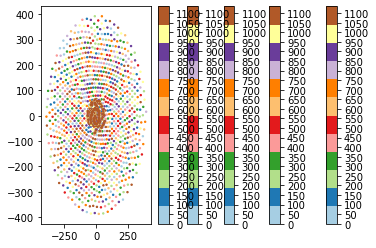

In [56]:
for i in range(0,50,10):
    tsne = sklearn.manifold.TSNE(perplexity=i)
    tsne.fit(X)
    embedding = tsne.embedding_
    np.shape(embedding)
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=2.0)
    plt.colorbar(boundaries=Y-0.5).set_ticks(np.arange(0,cnt,50))#(Y)

In [57]:
n_clusters = 10
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster

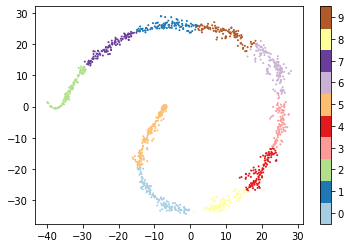

In [59]:
n_clusters = 10
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

In [53]:
for i in range(0,10,2): print(i)

0
2
4
6
8


In [ ]:
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))